## Logistic Regression Project

## Importing the Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc



## Getting the Dataset

In [2]:
df = pd.read_csv("C:/Users/soura/OneDrive/Desktop/Vaibhav DS/Datasets/bank-full.csv",sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
# Finding the missing values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


###### In tnis, dataset no missing values present


##### Get Overall Statstics of Dataset

In [7]:

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Data Visualisation

In [11]:
category  = df.select_dtypes(include = ['object','bool']).columns.values 

for column in category :
    print(column, "(", len(df[column].unique()), "values):\n", np.sort(df[column].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
y ( 2 values):
 ['no' 'yes']


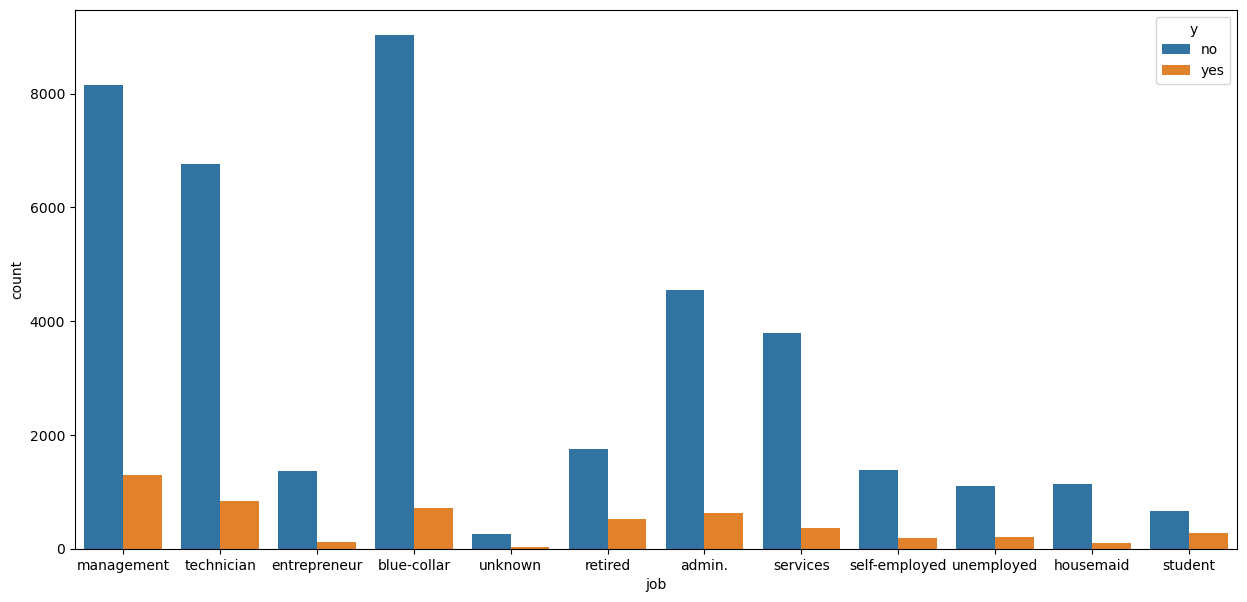

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(x=df.job,hue = df.y, data=df)
plt.show()

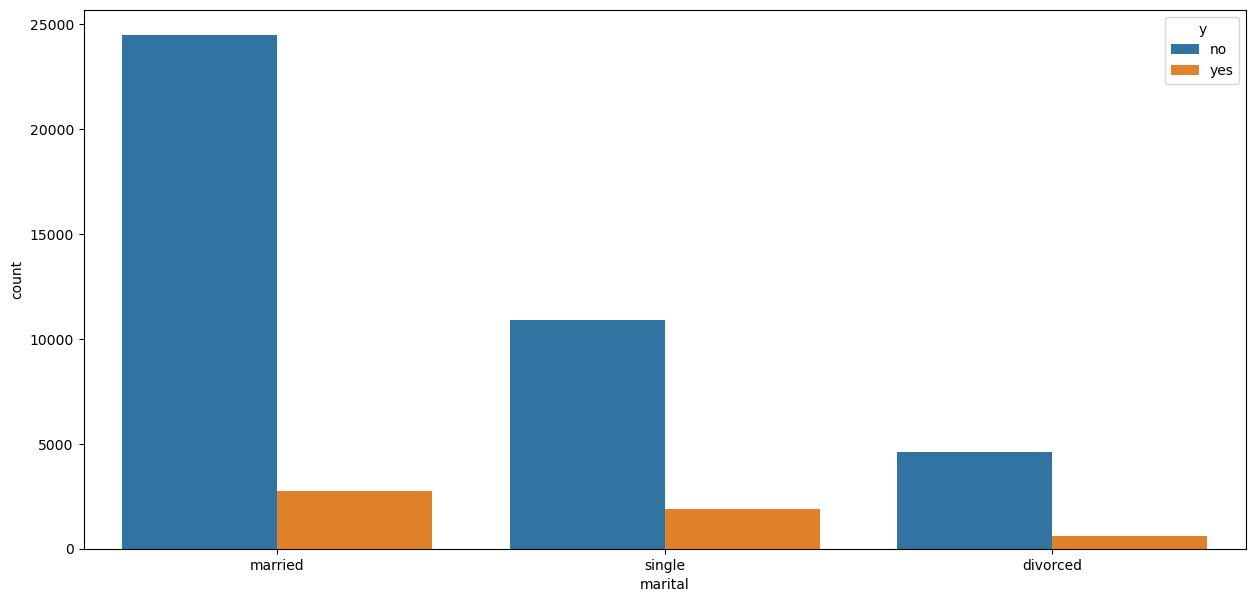

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(x=df.marital,hue=df.y, data=df)
plt.show()

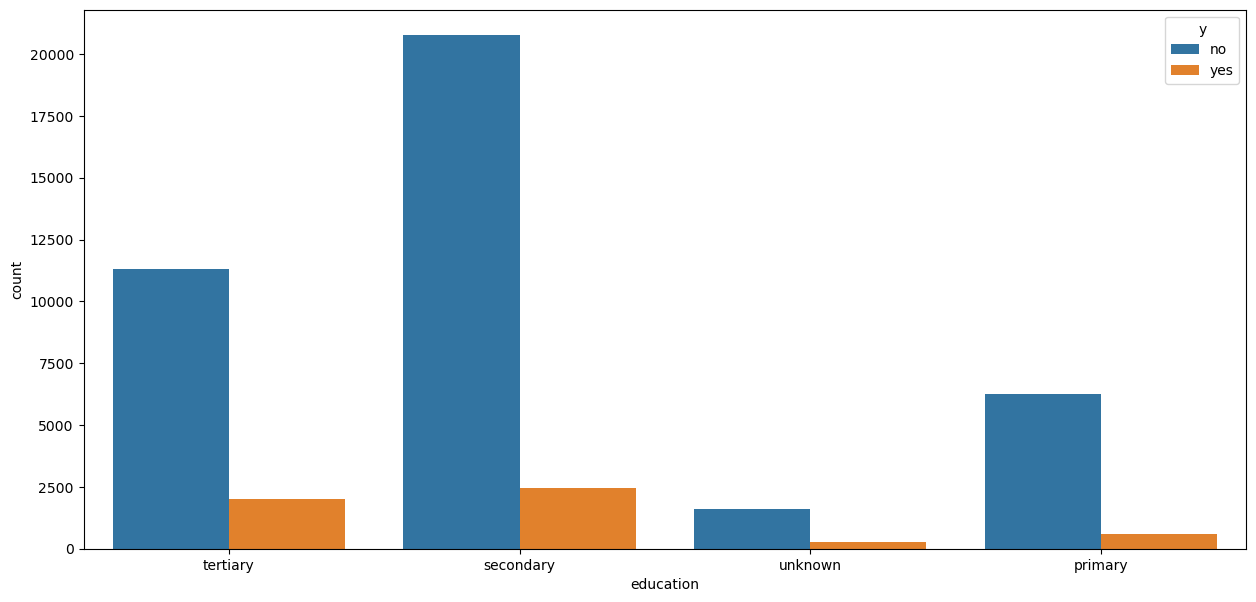

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x=df.education,hue=df.y, data=df)
plt.show()

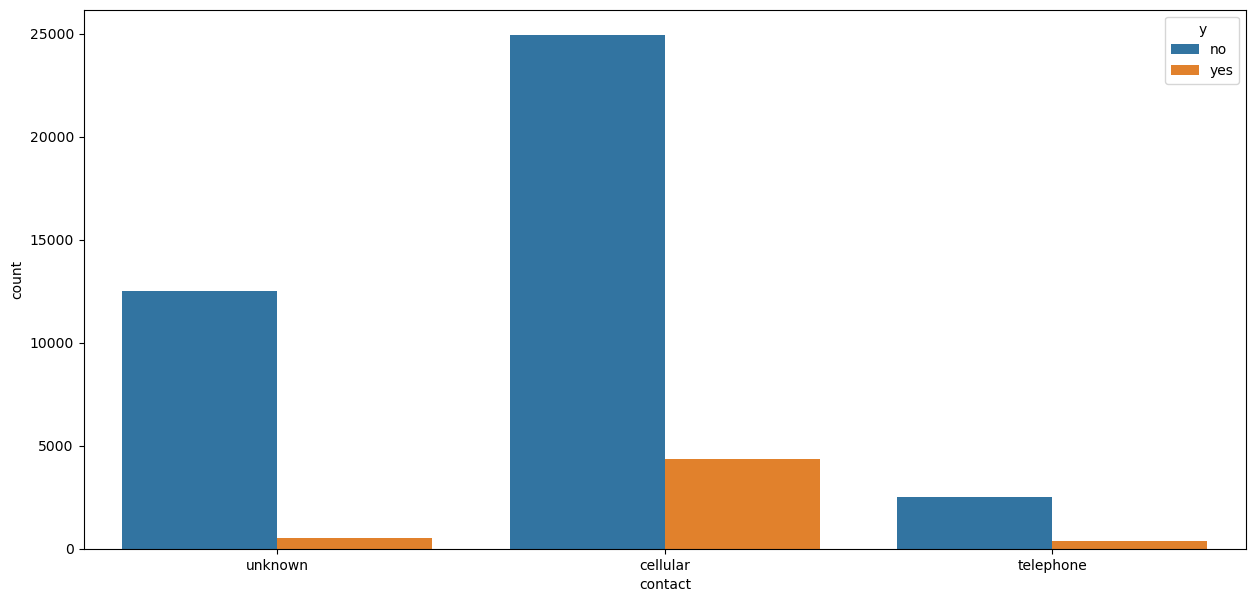

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x=df.contact,hue=df.y, data=df)
plt.show()

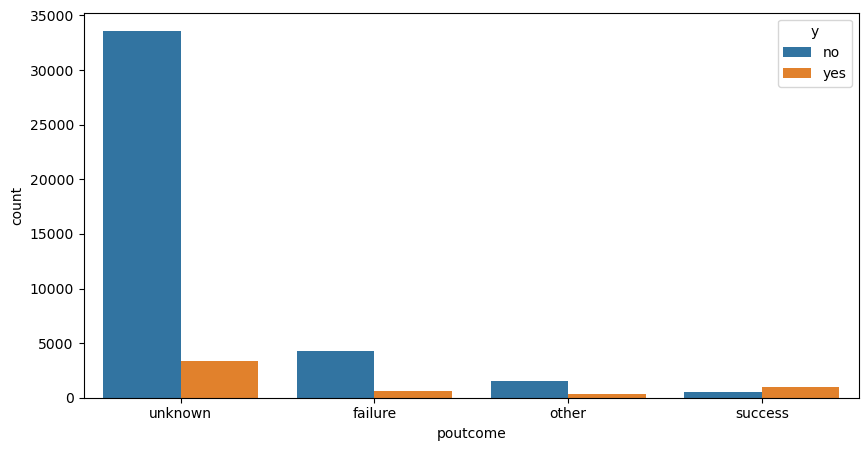

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.poutcome,hue=df.y, data=df)
plt.show()

From poutcome Success has more chance to getting the client has subscribed a term deposit.

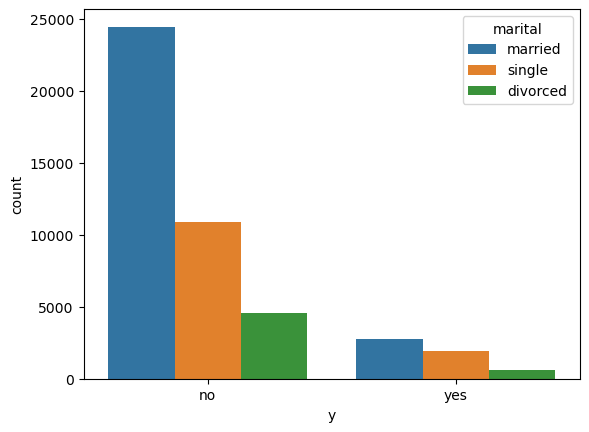

In [17]:
sns.countplot(x=df.y,hue=df.marital,data=df)
plt.show()

In [18]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Encoding

In [19]:
### Converting categorical values into the numerical values

df.replace({"job": {'admin.':1,'blue-collar':2,'entrepreneur':3,'housemaid':4,'management':5,'retired':6,
                    'self-employed':7,'services':8,'student':9,'technician':10,'unemployed':11,'unknown':12}},inplace= True)
df.replace({"marital": {'divorced':1,'married':2,'single':3,}},inplace= True)
df.replace({"education": {'primary':1,'secondary':2,'tertiary':3,'unknown':4}},inplace= True)
df.replace({"default": {'no':0,'yes':1},'housing':{'yes':1,'no':0},'loan':{'yes':1,'no':0}},inplace= True)
df.replace({"month": {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}},inplace= True)
df.replace({"poutcome": {'failure':1,'other':2,'success':3,'unknown':4}},inplace= True)


In [20]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,2,3,0,2143,1,0,unknown,5,5,261,1,-1,0,4,no
1,44,10,3,2,0,29,1,0,unknown,5,5,151,1,-1,0,4,no
2,33,3,2,2,0,2,1,1,unknown,5,5,76,1,-1,0,4,no
3,47,2,2,4,0,1506,1,0,unknown,5,5,92,1,-1,0,4,no
4,33,12,3,4,0,1,0,0,unknown,5,5,198,1,-1,0,4,no


In [21]:
## Drop contact column
df.drop(['contact'],axis =1,inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,5,2,3,0,2143,1,0,5,5,261,1,-1,0,4,no
1,44,10,3,2,0,29,1,0,5,5,151,1,-1,0,4,no
2,33,3,2,2,0,2,1,1,5,5,76,1,-1,0,4,no
3,47,2,2,4,0,1506,1,0,5,5,92,1,-1,0,4,no
4,33,12,3,4,0,1,0,0,5,5,198,1,-1,0,4,no


C:\Users\soura\AppData\Local\Temp\ipykernel_13860\723059540.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

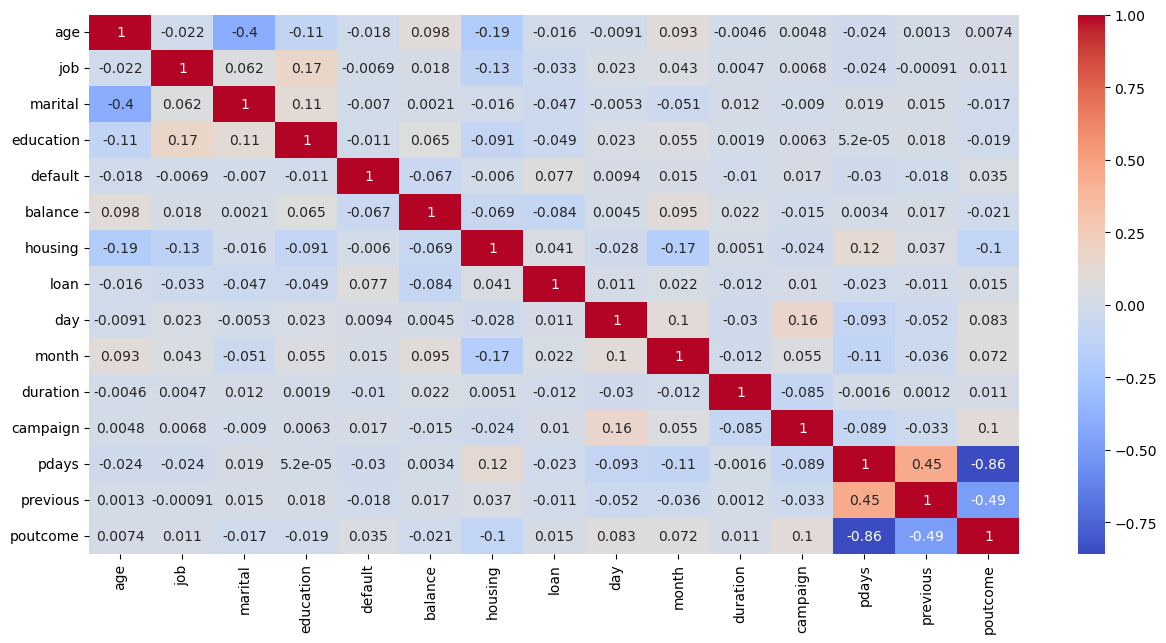

In [22]:
# To finding Correaltionship between each column
plt.subplots(figsize = (15,7))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: xlabel='y', ylabel='count'>

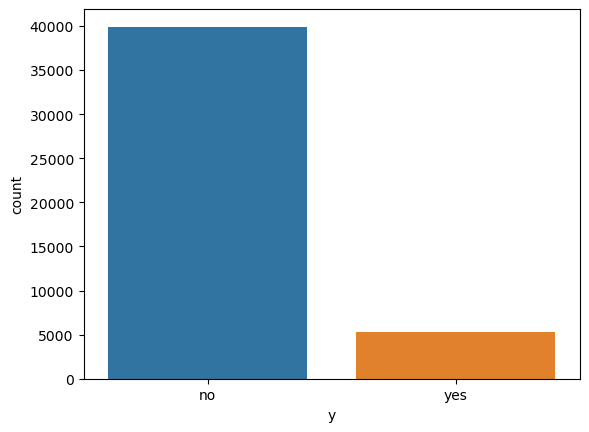

In [23]:
sns.countplot(x='y',data = df)

### Separating the data into X and Y

In [24]:

X = df.drop(["y"],axis = 1) 
y = df['y']

In [25]:
print(X)

       age  job  marital  education  default  balance  housing  loan  day  \
0       58    5        2          3        0     2143        1     0    5   
1       44   10        3          2        0       29        1     0    5   
2       33    3        2          2        0        2        1     1    5   
3       47    2        2          4        0     1506        1     0    5   
4       33   12        3          4        0        1        0     0    5   
...    ...  ...      ...        ...      ...      ...      ...   ...  ...   
45206   51   10        2          3        0      825        0     0   17   
45207   71    6        1          1        0     1729        0     0   17   
45208   72    6        2          2        0     5715        0     0   17   
45209   57    2        2          2        0      668        0     0   17   
45210   37    3        2          2        0     2971        0     0   17   

       month  duration  campaign  pdays  previous  poutcome  
0          5 

In [26]:
print(y)

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object


In [27]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### Splitting the data into Train & Test

In [28]:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 15)
(9043, 15)
(36168,)
(9043,)


In [30]:
print(X_train)

       age  job  marital  education  default  balance  housing  loan  day  \
3344    41    2        2          1        0      849        1     0   15   
17965   49   10        2          1        0     1415        1     0   30   
18299   42    1        2          2        0     3842        0     0   31   
10221   37    5        3          3        0     -119        1     0   11   
32192   56    2        2          1        0     3498        0     0   15   
...    ...  ...      ...        ...      ...      ...      ...   ...  ...   
11284   44    4        3          1        0     1059        0     0   18   
44732   23    9        3          3        0      508        0     0    8   
38158   34   10        1          3        0     1317        1     0   15   
860     33    6        2          2        0      165        0     0    7   
15795   38    2        2          1        0      -41        1     0   21   

       month  duration  campaign  pdays  previous  poutcome  
3344       5 

### Training of the Model

In [31]:

model = LogisticRegression()
train = model.fit(X_train,y_train)
pred = train.predict(X_test)
print('The Predicted output is - ', pred)


The Predicted output is -  ['no' 'no' 'no' ... 'no' 'no' 'no']


C:\Users\soura\anaconda3\Vaibhav DS\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Checking of accuracy

In [32]:

 
results = accuracy_score(y_test,pred)
print('The Accuracy is - ', results*100)


The Accuracy is -  88.34457591507243


In [33]:
print("predict Probability")
train.predict_proba(X_test)



predict Probability


array([[0.9247715 , 0.0752285 ],
       [0.94757659, 0.05242341],
       [0.87698913, 0.12301087],
       ...,
       [0.93986424, 0.06013576],
       [0.93955594, 0.06044406],
       [0.90837576, 0.09162424]])

In [34]:
cf = confusion_matrix(y_test,pred, labels=train.classes_,)
cf



array([[7793,  159],
       [ 895,  196]], dtype=int64)

<Axes: >

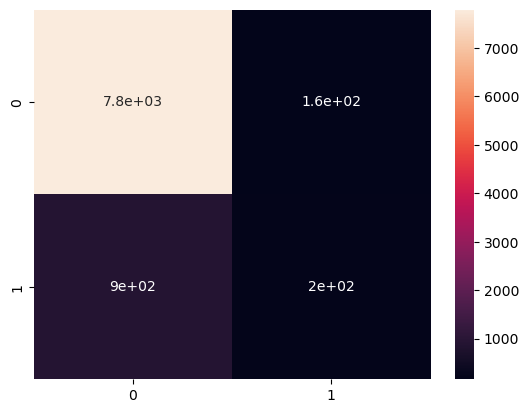

In [35]:
sns.heatmap(cf,annot=True)

In [36]:
print('Actual  - ',list(y_test))
print('Predict - ',list(pred))


Actual  -  ['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', '

## Accuracy of this Model is 88.34 %. Which means model has well fitted. 

In [37]:
import joblib

joblib.dump(model,'Bank_prj_7.sav')

['Bank_prj_7.sav']